### 데이터 확인 하기
- 아이템별 지표 확인하기  
- 시간별 지역별 판매 지표 확인하기  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [3]:
dtypes = {
    'UniPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('./data/OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
Unnamed: 0       397884 non-null int64
InvoiceNo        397884 non-null int64
StockCode        397884 non-null object
Description      397884 non-null object
Quantity         397884 non-null int32
InvoiceDate      397884 non-null object
UnitPrice        397884 non-null float64
CustomerID       397884 non-null int32
Country          397884 non-null object
CheckoutPrice    397884 non-null float64
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 27.3+ MB


In [5]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],
                                      infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
Unnamed: 0       397884 non-null int64
InvoiceNo        397884 non-null int64
StockCode        397884 non-null object
Description      397884 non-null object
Quantity         397884 non-null int32
InvoiceDate      397884 non-null datetime64[ns]
UnitPrice        397884 non-null float64
CustomerID       397884 non-null int32
Country          397884 non-null object
CheckoutPrice    397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 27.3+ MB


- 전체 매출  
- 국가별 매출  
- 월별 매출  
- 요일별 매출  
- 시간별 매출 

In [6]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [7]:
# 국가별 매출
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()

In [8]:
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

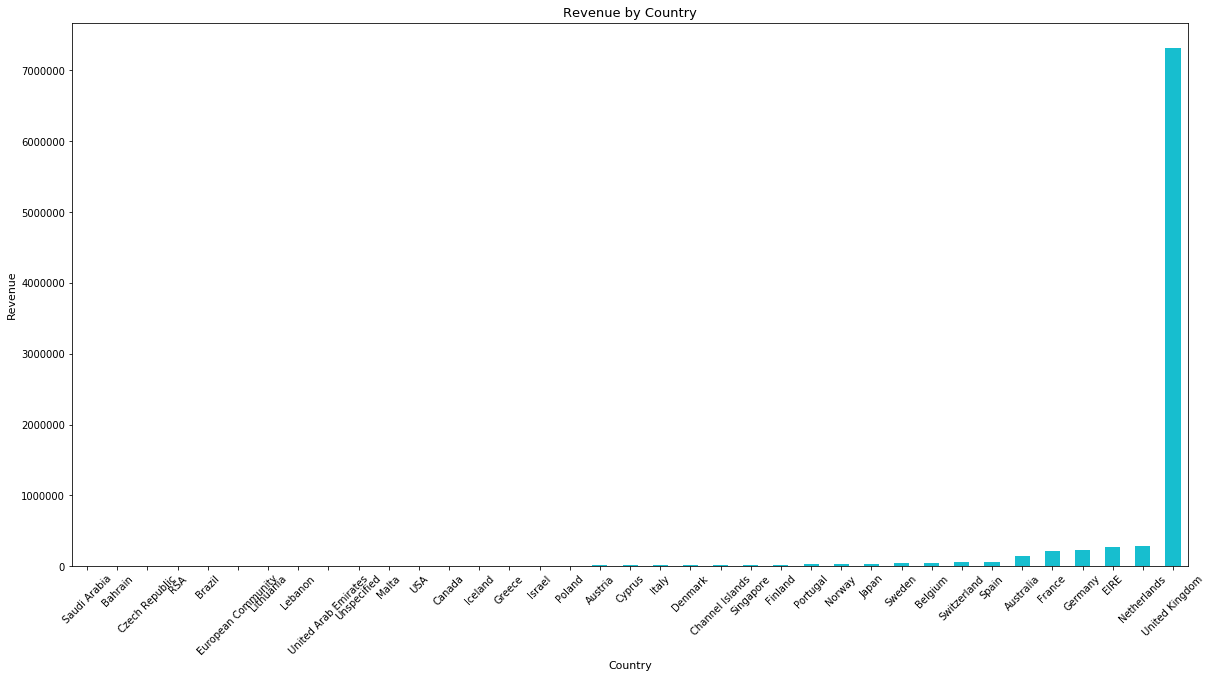

In [11]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

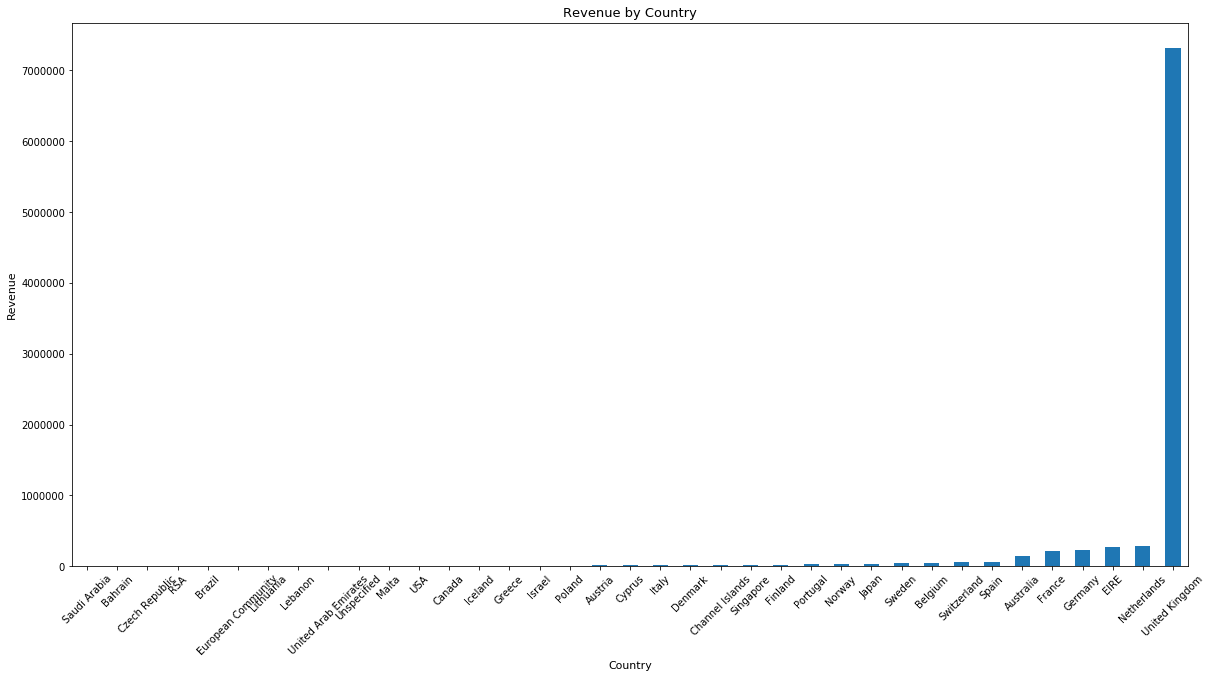

In [12]:
def plot_def(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

plot_def(rev_by_countries, 'Country', 'Revenue', 'Revenue by Country')

In [13]:
# 월별 매출
retail['InvoiceDate'].sort_values(ascending=False)

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [14]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [19]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()
rev_by_month

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
201012,520083532,14072707240,312265,81935.610,406196835,572713.890
201101,1285805664,11492803914,349098,66964.990,321863240,569445.040
201102,1823668831,10841427849,265622,63185.760,305207531,447137.350
201103,3350125843,14860772808,348503,88563.100,412653906,595500.760
201104,3541342366,12452863569,292222,79005.481,345925717,469200.361
201105,5400092744,15669690030,373601,102128.280,431128726,678594.560
201106,6178964643,15138257658,363699,85274.730,416663110,661213.690
201107,7154671014,15030051462,369420,75919.901,410674538,600091.011
201108,8160826087,15216184267,398121,79423.830,412055398,645343.900
201109,13851161688,22702364753,544897,119053.062,610865157,952838.382


In [ ]:
plot = rev_by_month.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_month.index, rotation=45)

In [ ]:
plot_def(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

In [ ]:
# 요일별 매출
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

In [21]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

In [ ]:
plot_def(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

In [ ]:
# 시간별 매출
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_def(rev_by_hour, 'Hour', 'Revenue', 'Revenue by Hour')

In [27]:
retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [28]:
# Top 10 판매 제품
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]

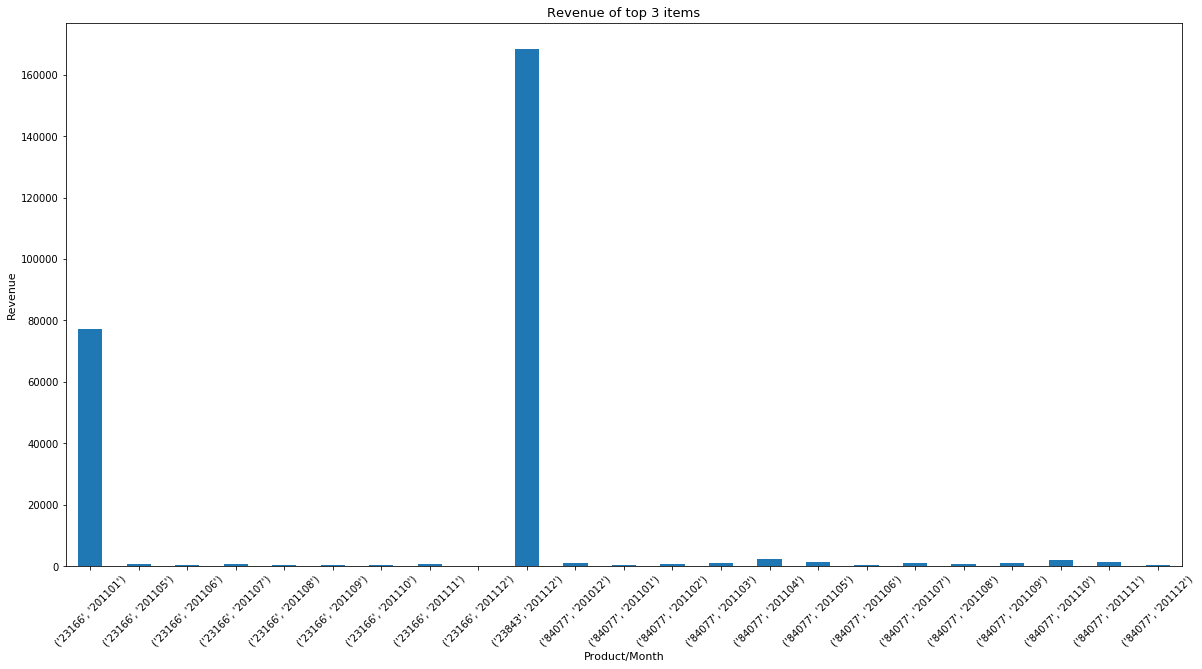

In [31]:
# top3 아이템의 월별 판매량 추이
monthly_top3 = retail.set_index('InvoiceDate')
    .groupby(['StockCode', extract_month])
    .sum()[['Quantity', 'CheckoutPrice']]
    .loc[top_selling.index]
plot_def(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items' )